<a href="https://colab.research.google.com/github/hossamfadeel/MyLibrary/blob/master/adder_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenLane adder flow with conda-eda packages

## Setup (RUN ME FIRST)

### Credits

In [ ]:
print("Base template for this notebook was built by forking proppy's GitHub Gist at https://gist.github.com/proppy/26525ff7d9810247759a8d3ff3c41dcb")

Base template for this notebook was built by forking proppy's GitHub Gist at https://gist.github.com/proppy/26525ff7d9810247759a8d3ff3c41dcb


### Install conda

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install_from_url("https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh")

⏬ Downloading https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


### Install dependencies

In [ ]:
%%writefile environment.yml
channels:
  - litex-hub
  - conda-forge
dependencies:
  - open_pdks.sky130a=1.0.290
  - magic
  - openroad
  - netgen
  - yosys
  - gdstk
  - pip:
    - pyyaml
    - click
    - pandas

Writing environment.yml


In [ ]:
!conda env update --prefix /usr/local --file environment.yml
!apt-get update && apt-get install -yq tcllib
!test -f klayout_0.27.8-1_amd64.deb || curl -O https://www.klayout.org/downloads/Ubuntu-18/klayout_0.27.8-1_amd64.deb
!dpkg -i klayout_0.27.8-1_amd64.deb; apt-get update && apt-get -f -yq install

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

### Clone OpenLane



In [ ]:
!git clone --depth=1 https://github.com/The-OpenROAD-Project/OpenLane

Cloning into 'OpenLane'...
remote: Enumerating objects: 488, done.
remote: Counting objects: 100% (488/488), done.
remote: Compressing objects: 100% (402/402), done.
remote: Total 488 (delta 103), reused 224 (delta 39), pack-reused 0
Receiving objects: 100% (488/488), 1.57 MiB | 6.86 MiB/s, done.
Resolving deltas: 100% (103/103), done.


### Install pptrees library

In [ ]:
%pip install git+https://github.com/tdene/synth_opt_adders.git --user

  Cloning https://github.com/tdene/synth_opt_adders.git to /tmp/pip-req-build-dk6k3vdw
  Running command git clone -q https://github.com/tdene/synth_opt_adders.git /tmp/pip-req-build-dk6k3vdw
  Created wheel for pptrees: filename=pptrees-0.0.2-py3-none-any.whl size=37052 sha256=fc5caa5b1bfd7fd37bc9e624404a1a5340bc730efe9aab69971abac2905582d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-t2_igri2/wheels/46/ba/74/bbe32b722a1f52c3c3aa52fcbdb050975cb54826ed0e4f77cd
Successfully built pptrees


# Generate some adders

## Import relevant module

In [ ]:
from pptrees.adder_tree import adder_tree as tree

ModuleNotFoundError: ignored

### Generate a classic adder structure

In [ ]:
sk_adder = tree(32,"sklansky")

# Generate verilog, directly mapped to sky130_fd_sc_hd
sk_adder.hdl(out="sklansky.v",mapping="sky130_fd_sc_hd",top_module="sklansky")

sk_adder.png('sklansky.png')
from IPython.display import Image
Image(filename="sklansky.png")

NameError: ignored

### Start with a classic adder structure, then add a twist!

In [ ]:
custom_adder = tree(32,"sklansky")

# Apply sequence of transforms
custom_adder.harris_step('FL',1,top_bit=16)
custom_adder.harris_step('FL',3,top_bit=16)
custom_adder.harris_step('FL',1,top_bit=8)
custom_adder.harris_step('FL',1,top_bit=4)

# Generate verilog, directly mapped to sky130_fd_sc_hd
custom_adder.hdl(out="custom.v",mapping="sky130_fd_sc_hd",top_module="custom")

custom_adder.png('custom.png')
from IPython.display import Image
Image(filename="custom.png")

# Implement adders through OpenLane

## Setup (RUN ME FIRST)

### Set various OpenLane environment variables

In [ ]:
import os
PATH=os.environ['PATH']
%env PDK_ROOT=/usr/local/share/pdk
%env OPENLANE_ROOT=/content/OpenLane
%env PATH={PATH}:/content/OpenLane:/content/OpenLane/scripts
%env TCLLIBPATH=/usr/share/tcltk
%env OPENLANE_LOCAL_INSTALL=1

env: PDK_ROOT=/usr/local/share/pdk
env: OPENLANE_ROOT=/content/OpenLane
env: PATH=/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts:/content/OpenLane:/content/OpenLane/scripts
env: TCLLIBPATH=/usr/share/tcltk
env: OPENLANE_LOCAL_INSTALL=1


### Clone a repository that allows for easy parsing of implementation results

In [ ]:
!rm -r adder_networks
!git clone https://github.com/tdene/adder_networks.git
!pip install -r adder_networks/requirements.txt

Cloning into 'adder_networks'...
remote: Enumerating objects: 2808, done.
remote: Counting objects: 100% (2808/2808), done.
remote: Compressing objects: 100% (485/485), done.
remote: Total 2808 (delta 2312), reused 2698 (delta 2206), pack-reused 0
Receiving objects: 100% (2808/2808), 3.02 MiB | 7.84 MiB/s, done.
Resolving deltas: 100% (2312/2312), done.


## Run Sklansky adder through OpenLane

### Create OpenLane config file for our design

In [ ]:
!echo "# OpenLane configs" > sklansky_config.tcl

# Basic flow switches to make the flow run smoothly (and fast)
!echo "set ::env(SYNTH_MAX_FANOUT) 4" >> sklansky_config.tcl
!echo "set ::env(IO_PCT) 0" >> sklansky_config.tcl
## Disable some slow steps for the sake of runtime
!echo "set ::env(RUN_LVS) 0" >> sklansky_config.tcl
!echo "set ::env(RUN_MAGIC_DRC) 0" >> sklansky_config.tcl
!echo "set ::env(RUN_KLAYOUT_DRC) 0" >> sklansky_config.tcl
## Our design has no clock
!echo "set ::env(CLOCK_TREE_SYNTH) 0" >> sklansky_config.tcl

# These are the actual design-specific flow switches
## Set target clock
!echo "set ::env(CLOCK_PERIOD) 10.0" >> sklansky_config.tcl
## Set floorplan area and density target
!echo "set ::env(PL_TARGET_DENSITY) 0.85" >> sklansky_config.tcl
!echo "set ::env(FP_CORE_UTIL) 30" >> sklansky_config.tcl
## Account for the fact that the Python library already mapped cells
!echo "set ::env(SYNTH_NO_FLAT) 0" >> sklansky_config.tcl
!echo "set ::env(SYNTH_READ_BLACKBOX_LIB) 1" >> sklansky_config.tcl

### Create our OpenLane design

In [ ]:
!rm -rf OpenLane/designs/sklansky
!flow.tcl -design sklansky -init_design_config -src "sklansky.v sky130_fd_sc_hd_map.v"
!cp sklansky_config.tcl OpenLane/designs/sklansky/sky130A_sky130_fd_sc_hd_config.tcl

OpenLane a0084531aa2919d68f68a443e09b1d29950eef6e
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Creating design src directory /content/OpenLane/designs/sklansky/src
[INFO]: Populating /content/OpenLane/designs/sklansky/config.tcl..
[INFO]: Copying sklansky.v to sklansky.v
[INFO]: Copying sky130_fd_sc_hd_map.v to sky130_fd_sc_hd_map.v
[INFO]: Finished populating:
/content/OpenLane/designs/sklansky/config.tcl 
Please modify CLOCK_PORT, CLOCK_PERIOD and add your advanced settings to /content/OpenLane/designs/sklansky/config.tcl
[SUCCESS]: Done...


### Run OpenLane

In [ ]:
!flow.tcl -design sklansky -override_env RUN_CVC=0,MISMATCHES_OK=1

OpenLane a0084531aa2919d68f68a443e09b1d29950eef6e
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using design configuration at /content/OpenLane/designs/sklansky/config.tcl
[INFO]: Sourcing Configurations from /content/OpenLane/designs/sklansky/config.tcl
[INFO]: PDKs root directory: /usr/local/share/pdk
[INFO]: PDK: sky130A
[INFO]: Setting PDKPATH to /usr/local/share/pdk/sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library is set to: sky130_fd_sc_hd
[INFO]: Sourcing Configurations from /content/OpenLane/designs/sklansky/config.tcl
[INFO]: Current run directory is /content/OpenLane/designs/sklansky/runs/RUN_2022.04.06_15.10.05
[INFO]: Preparing LEF Files...
[WARNING]: OpenLane may not function properly: Failed to compare PDKs.
Malformed .config/nodeinfo.json.
Traceback (most recent call last):
  File "/content/OpenLane/

### Visualize the final layout

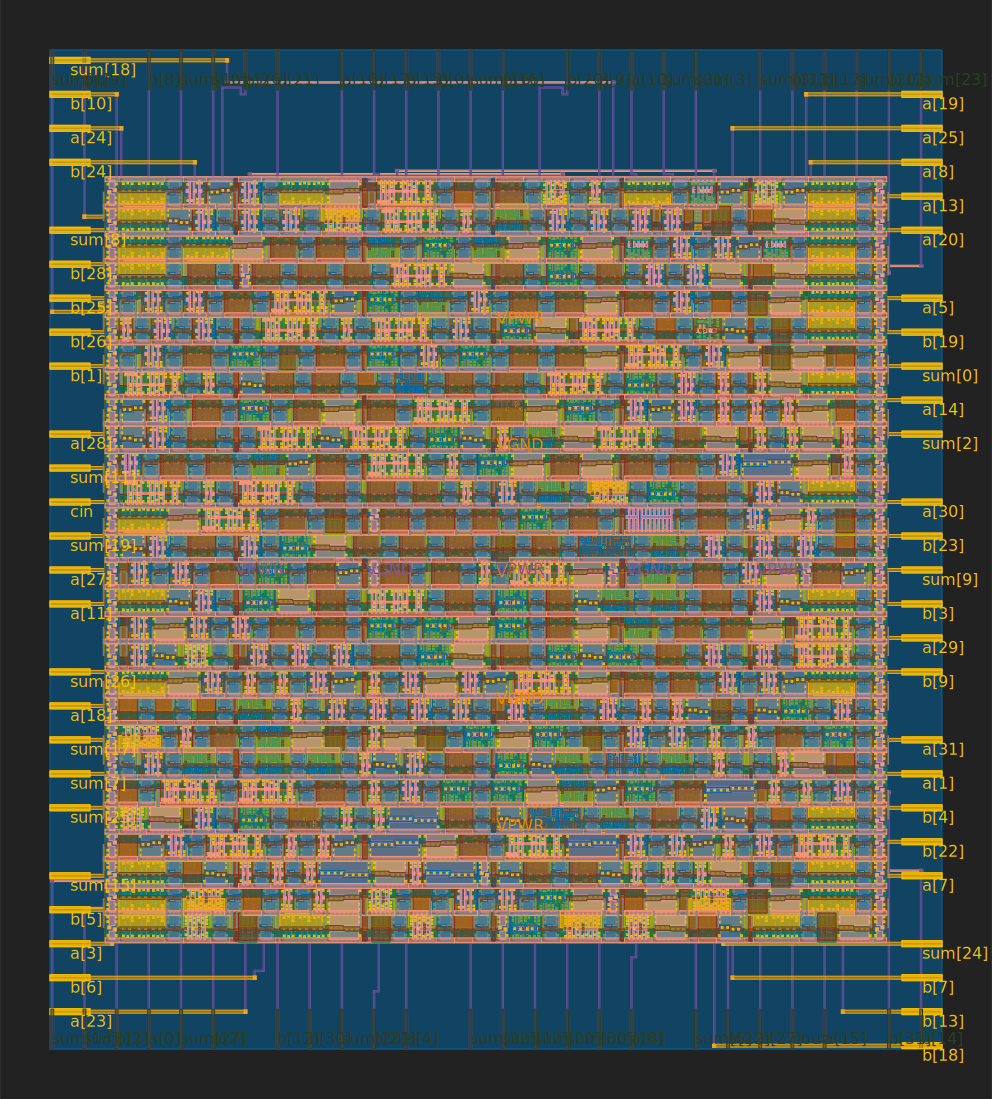

In [ ]:
import pathlib
import gdstk
from IPython.display import SVG

gdss = sorted(pathlib.Path('OpenLane/designs/sklansky/runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[0])
top_cells = library.top_level()
top_cells[0].write_svg('sklansky.svg')
SVG('sklansky.svg')

### Copy OpenLane results to adder_networks repo, for easy parsing

In [ ]:
!mkdir -p adder_networks/adders
!mkdir -p adder_networks/adders/32bit
!mkdir -p adder_networks/adders/32bit/reports
!rm -rf adder_networks/adders/32bit/reports/sky130_fd_sc_hd/sklansky
!cp -r OpenLane/designs/sklansky/runs/*/reports/ adder_networks/adders/32bit/reports/sky130_fd_sc_hd/sklansky/

### View results

In [ ]:
!cd adder_networks && python3 scripts/parse.py --width 32 --names "sklansky" --target_density="30%"

Width (# of bits),Adder architecture,Target density,Std Cell count,Worst path delay,Maximum frequency,Area,Power,Energy,Achieved density,Worst path delay,Maximum frequency,Area,Power,Energy
32,Sklansky,30%,258,4.7 ns,213.0 MHz,2962.0 µm²,1590.0 µW,7473.0 fJ,50%,1.9 ns,526.0 MHz,1836.0 µm²,878.0 µW,1668.0 fJ



## Run custom adder through OpenLane

### Create OpenLane config file for our design

In [ ]:
!echo "# OpenLane configs" > custom_config.tcl

# Basic flow switches to make the flow run smoothly (and fast)
!echo "set ::env(SYNTH_MAX_FANOUT) 4" >> custom_config.tcl
!echo "set ::env(IO_PCT) 0" >> custom_config.tcl
## Disable some slow steps for the sake of runtime
!echo "set ::env(RUN_LVS) 0" >> custom_config.tcl
!echo "set ::env(RUN_MAGIC_DRC) 0" >> custom_config.tcl
!echo "set ::env(RUN_KLAYOUT_DRC) 0" >> custom_config.tcl
## Our design has no clock
!echo "set ::env(CLOCK_TREE_SYNTH) 0" >> custom_config.tcl

# These are the actual design-specific flow switches
## Set target clock
!echo "set ::env(CLOCK_PERIOD) 10.0" >> custom_config.tcl
## Set floorplan area and density target
!echo "set ::env(PL_TARGET_DENSITY) 0.85" >> custom_config.tcl
!echo "set ::env(FP_CORE_UTIL) 30" >> custom_config.tcl
## Account for the fact that the Python library already mapped cells
!echo "set ::env(SYNTH_NO_FLAT) 0" >> custom_config.tcl
!echo "set ::env(SYNTH_READ_BLACKBOX_LIB) 1" >> custom_config.tcl

### Create our OpenLane design

In [ ]:
!rm -rf OpenLane/designs/custom
!flow.tcl -design custom -init_design_config -src "custom.v sky130_fd_sc_hd_map.v"
!cp custom_config.tcl OpenLane/designs/custom/sky130A_sky130_fd_sc_hd_config.tcl

OpenLane a0084531aa2919d68f68a443e09b1d29950eef6e
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Creating design src directory /content/OpenLane/designs/custom/src
[INFO]: Populating /content/OpenLane/designs/custom/config.tcl..
[INFO]: Copying custom.v to custom.v
[INFO]: Copying sky130_fd_sc_hd_map.v to sky130_fd_sc_hd_map.v
[INFO]: Finished populating:
/content/OpenLane/designs/custom/config.tcl 
Please modify CLOCK_PORT, CLOCK_PERIOD and add your advanced settings to /content/OpenLane/designs/custom/config.tcl
[SUCCESS]: Done...


### Run OpenLane

In [ ]:
!flow.tcl -design custom -override_env RUN_CVC=0,MISMATCHES_OK=1

OpenLane a0084531aa2919d68f68a443e09b1d29950eef6e
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using design configuration at /content/OpenLane/designs/custom/config.tcl
[INFO]: Sourcing Configurations from /content/OpenLane/designs/custom/config.tcl
[INFO]: PDKs root directory: /usr/local/share/pdk
[INFO]: PDK: sky130A
[INFO]: Setting PDKPATH to /usr/local/share/pdk/sky130A
[INFO]: Standard Cell Library: sky130_fd_sc_hd
[INFO]: Optimization Standard Cell Library is set to: sky130_fd_sc_hd
[INFO]: Sourcing Configurations from /content/OpenLane/designs/custom/config.tcl
[INFO]: Current run directory is /content/OpenLane/designs/custom/runs/RUN_2022.04.06_17.05.43
[INFO]: Preparing LEF Files...
[WARNING]: OpenLane may not function properly: Failed to compare PDKs.
Malformed .config/nodeinfo.json.
Traceback (most recent call last):
  File "/content/OpenLane/dependen

### Visualize the final layout

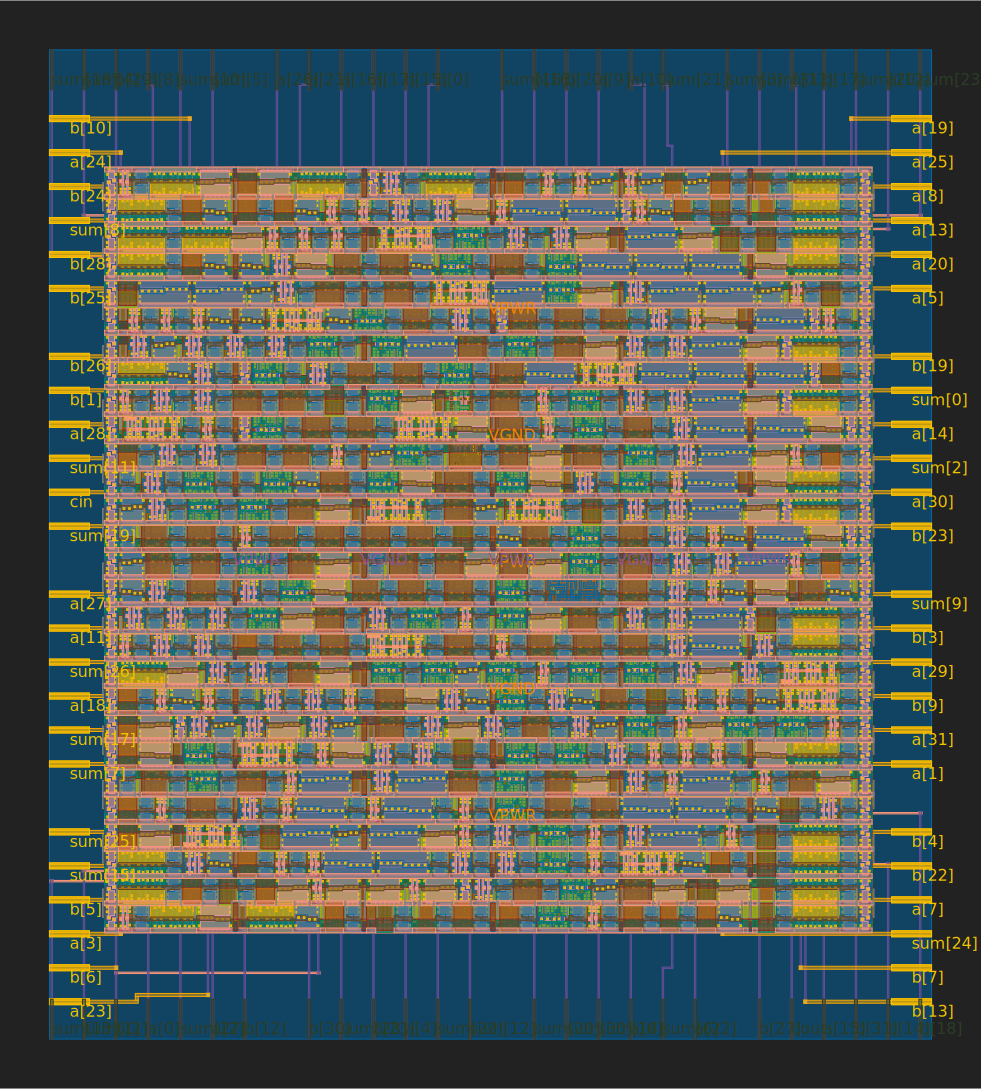

In [ ]:
import pathlib
import gdstk
from IPython.display import SVG

gdss = sorted(pathlib.Path('OpenLane/designs/custom/runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[0])
top_cells = library.top_level()
top_cells[0].write_svg('custom.svg')
SVG('custom.svg')

### Copy OpenLane results to adder_networks repo, for easy parsing

In [ ]:
!mkdir -p adder_networks/adders
!mkdir -p adder_networks/adders/32bit
!mkdir -p adder_networks/adders/32bit/reports
!rm -rf adder_networks/adders/32bit/reports/sky130_fd_sc_hd/custom
!cp -r OpenLane/designs/custom/runs/*/reports/ adder_networks/adders/32bit/reports/sky130_fd_sc_hd/custom/

### View results (side-by-side with Sklansky!)

In [ ]:
!cd adder_networks && python3 scripts/parse.py --width 32 --names "custom" "sklansky" --target_density="30%"

Width (# of bits),Adder architecture,Target density,Std Cell count,Worst path delay,Maximum frequency,Area,Power,Energy,Achieved density,Worst path delay,Maximum frequency,Area,Power,Energy
32,Custom,30%,256,4.61 ns,217.0 MHz,2848.0 µm²,186.0 µW,857.0 fJ,49%,1.76 ns,568.0 MHz,1790.0 µm²,122.0 µW,215.0 fJ
32,Sklansky,30%,258,4.7 ns,213.0 MHz,2962.0 µm²,1590.0 µW,7473.0 fJ,50%,1.9 ns,526.0 MHz,1836.0 µm²,878.0 µW,1668.0 fJ

